In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, date
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

In [72]:
import pandas as pd
import numpy as np
from datetime import datetime, date

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [3]:
df = pd.read_csv('train_data_nolog_pc.csv.csv')
df.head()

/var/folders/vg/7d4f1ys12s17fxmrbfx48h4h0000gn/T/ipykernel_5161/4197311411.py:1: DtypeWarning: Columns (0,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Cross Road Analytics Competition Dataset.csv')


,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,SeatUniqueID,Season,ClubExpYear,Tenure,UniqueID,isAttended,Resold,ResalePrice,ResaleDate,isSTM
0,117948790,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,1,FR,...,101-10-1,2021,NaN,25.0,CLT21HOU-101-10-1,Yes,NaN,NaN,NaN,NaN
1,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,10,FR,...,101-10-10,2021,NaN,20.0,CLT21HOU-101-10-10,No,NaN,NaN,NaN,NaN
2,126665090,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,11,FR,...,101-10-11,2021,NaN,20.0,CLT21HOU-101-10-11,No,NaN,NaN,NaN,NaN
3,1489599590,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,12,FR,...,101-10-12,2021,NaN,4.0,CLT21HOU-101-10-12,Yes,NaN,NaN,NaN,NaN
4,115101990,Season,CLT21HOU,2021-10-17,21FS,Not Comp,101,10,13,FR,...,101-10-13,2021,NaN,32.0,CLT21HOU-101-10-13,No,NaN,NaN,NaN,NaN


### Handling Null values in Categorical Columns

In [88]:
from feature_engine.imputation import CategoricalImputer
imputer = CategoricalImputer(variables=['comp_name','paid'])

In [89]:
df1 = df.copy()

In [90]:
imputer.fit(df1)
x= imputer.transform(df1)
x

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,price_code_mod,lagged,between_event_date,event_date_month,event_date_weekday,event_holiday_or_not,Section_Name_based_on_price,comp_name_group,event_date_day,isEndMonth
0,117948790,Season,CLT21HOU,2021-10-17,FS,Not Comp,101,10,1,FR,...,R,0,18917,10,6,False,Yellow,0,17,1
1,126665090,Season,CLT21HOU,2021-10-17,FS,Not Comp,101,10,10,FR,...,R,0,18917,10,6,False,Yellow,0,17,1
2,126665090,Season,CLT21HOU,2021-10-17,FS,Not Comp,101,10,11,FR,...,R,2021-10-17,0,10,6,False,Yellow,0,17,1
3,1489599590,Season,CLT21HOU,2021-10-17,FS,Not Comp,101,10,12,FR,...,R,0,18917,10,6,False,Yellow,0,17,1
4,115101990,Season,CLT21HOU,2021-10-17,FS,Not Comp,101,10,13,FR,...,R,0,18917,10,6,False,Yellow,0,17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158223,1831131890,Season,CLT22WAS,2022-10-30,FS,Not Comp,646,9,5,RN,...,N,2022-10-30,0,10,6,False,Violetish_red,0,30,0
1158224,1831131890,Season,CLT22WAS,2022-10-30,FS,Not Comp,646,9,6,RN,...,N,2022-10-30,0,10,6,False,Violetish_red,0,30,0
1158225,1246180690,Sponsor,CLT22WAS,2022-10-30,FS8,Not Comp,646,9,7,RR,...,R,2022-10-30,0,10,6,False,Violetish_red,0,30,0
1158226,1246180690,Sponsor,CLT22WAS,2022-10-30,FS8,Not Comp,646,9,8,RR,...,R,2022-10-30,0,10,6,False,Violetish_red,0,30,0


In [91]:
df=x.copy()
df.isnull().sum()

acct_id                        0
acct_type_desc                 0
event_name                     0
event_date                     0
plan_event_name                0
                              ..
event_holiday_or_not           0
Section_Name_based_on_price    0
comp_name_group                0
event_date_day                 0
isEndMonth                     0
Length: 49, dtype: int64

In [92]:
df['sales_crc_encode'] = df['Sales_Source'].apply(lambda x: 1 if (x >0) else 0)

In [94]:
df.drop(columns=['Sales_Source','Start Year','LastYear','ClubExpYear'],inplace=True)
df.isnull().sum()

acct_id                        0
acct_type_desc                 0
event_name                     0
event_date                     0
plan_event_name                0
                              ..
Section_Name_based_on_price    0
comp_name_group                0
event_date_day                 0
isEndMonth                     0
sales_crc_encode               0
Length: 46, dtype: int64

In [95]:
df[df['Tenure']==0]

,acct_id,acct_type_desc,event_name,event_date,plan_event_name,comp_name,section_name,row_name,SeatNum,price_code,...,lagged,between_event_date,event_date_month,event_date_weekday,event_holiday_or_not,Section_Name_based_on_price,comp_name_group,event_date_day,isEndMonth,sales_crc_encode
7108,1738241190,Season,CLT21HOU,2021-10-17,FS,Not Comp,117,22,17,B,...,0,18917,10,6,False,Lambert,0,17,1,0
7109,1738241190,Season,CLT21HOU,2021-10-17,FS,Not Comp,117,22,18,B,...,2021-10-17,0,10,6,False,Lambert,0,17,1,0
7110,1738241190,Season,CLT21HOU,2021-10-17,FS,Not Comp,117,22,19,B,...,2021-10-17,0,10,6,False,Lambert,0,17,1,0
7112,1738241190,Season,CLT21HOU,2021-10-17,FS,Not Comp,117,22,20,B,...,2021-10-17,0,10,6,False,Lambert,0,17,1,0
7113,1738241190,Season,CLT21HOU,2021-10-17,FS,Not Comp,117,22,21,B,...,2021-10-17,0,10,6,False,Lambert,0,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158207,1831131890,Season,CLT22WAS,2022-10-30,FS,Not Comp,646,8,3,RN,...,2022-10-02,28,10,6,False,Violetish_red,0,30,0,0
1158208,1831131890,Season,CLT22WAS,2022-10-30,FS,Not Comp,646,8,4,RN,...,2022-10-30,0,10,6,False,Violetish_red,0,30,0,0
1158222,1831131890,Season,CLT22WAS,2022-10-30,FS,Not Comp,646,9,4,RN,...,2022-10-30,0,10,6,False,Violetish_red,0,30,0,0
1158223,1831131890,Season,CLT22WAS,2022-10-30,FS,Not Comp,646,9,5,RN,...,2022-10-30,0,10,6,False,Violetish_red,0,30,0,0


## Replacing null values with 0

In [96]:
df['Tenure'].fillna(0,inplace=True)
df.isnull().sum()

acct_id                        0
acct_type_desc                 0
event_name                     0
event_date                     0
plan_event_name                0
                              ..
Section_Name_based_on_price    0
comp_name_group                0
event_date_day                 0
isEndMonth                     0
sales_crc_encode               0
Length: 46, dtype: int64

In [101]:
df['isSTM'].fillna(0,inplace=True)

In [102]:
df['Term'].fillna(0,inplace=True)

In [103]:
df['add_datetime'].fillna(df['event_date'],inplace=True)

In [106]:
pd.set_option("display.max_rows", 10)

In [113]:
df['Resold'].fillna(0, inplace=True)                               #Replacing the NaN values for Resold column with 0
df['ResalePrice'].fillna(0, inplace=True)                          #Replacing the NaN values for ResalePrice column with 0
df["Resold"] = df["Resold"].replace({'Yes':1})                     #Replacing the Yes values with 1 for Resold column
df['Resold'] = df['Resold'].astype(int)             #Changing the datatype of the column to int
df['ResalePrice'] = df['ResalePrice'].astype(float)
df.drop(columns=['ResaleDate'],inplace=True)
df.isnull().sum()#Changing the datatype of the column to Float

acct_id              0
acct_type_desc       0
event_name           0
event_date           0
plan_event_name      0
                    ..
comp_name_group      0
event_date_day       0
isEndMonth           0
sales_crc_encode     0
Difference_resale    0
Length: 46, dtype: int64

### Finding difference in resale date and event date

In [107]:
df['Difference_resale'] = (pd.to_datetime(df['event_date']) - pd.to_datetime(df['ResaleDate'])).dt.days

In [109]:
df['Difference_resale'].fillna(-1, inplace = True)

In [111]:
df['Difference_resale'] = df['Difference_resale'].apply(lambda x: x if (x >=0) else -1)

### Finding the difference between event date and purchase date

In [114]:
df['Difference'] = (df['event_date'] - df['add_datetime']).dt.days

In [115]:
df['Difference'] = df['Difference'].apply(lambda x : x if x > 0 else 0)

## Basic Visualization

<AxesSubplot:xlabel='event_date_weekday', ylabel='count'>

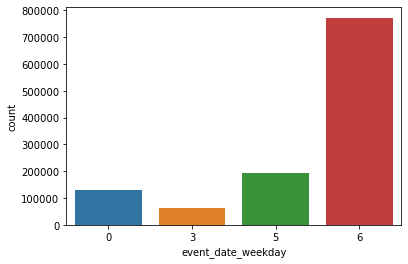

In [120]:
sns.countplot(x = df['event_date_weekday'])

<AxesSubplot:xlabel='plan_event_name', ylabel='count'>

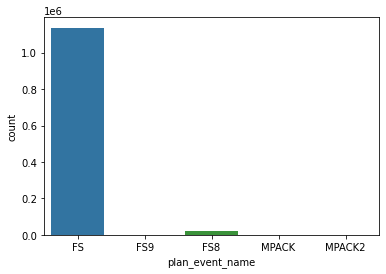

In [121]:
sns.countplot(x = df['plan_event_name'])

<AxesSubplot:xlabel='isHost', ylabel='count'>

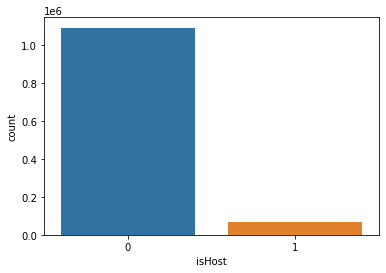

In [123]:
sns.countplot(x = df['isHost'])

In [124]:
df['isAttended'].value_counts()

1    900945
0    257283
Name: isAttended, dtype: int64

In [125]:
df['isAttended'].value_counts()

1    900945
0    257283
Name: isAttended, dtype: int64

<AxesSubplot:xlabel='isAttended', ylabel='count'>

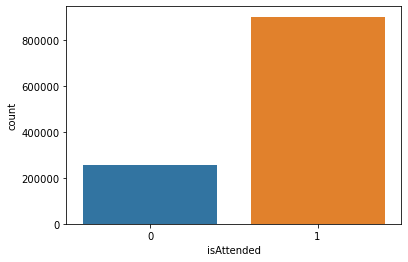

In [126]:
sns.countplot(x = df['isAttended'])

<AxesSubplot:xlabel='isAttended', ylabel='count'>

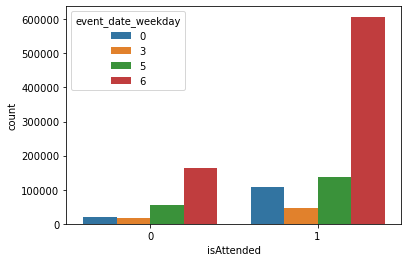

In [127]:
sns.countplot(x = df['isAttended'], hue = df['event_date_weekday'])

In [129]:
df['event_date_weeknum'] = df['event_date'].dt.isocalendar().week

In [130]:
df.drop(columns = ['event_date','add_datetime'],inplace=True)

### Taking log transformation of numerical columns

<AxesSubplot:ylabel='Frequency'>

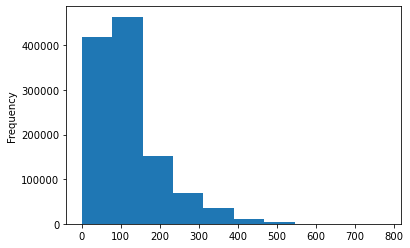

In [140]:
df['Price'].plot(kind = 'hist')

### We see that price is right skewed and hence we took log transformation

In [131]:
df['log_price'] = np.log2(df['Price'] + 1)

In [132]:
df['log_tenure'] = np.log2(df['Tenure'] + 1)

In [133]:
df['log_diff_resale'] = np.log2(df['Difference_resale'] + 1)

C:\Users\sasid\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [134]:
df['log_diff'] = np.log2(df['Difference'] + 1)

### Checking correlation 

In [143]:
corr['isAttended'].sort_values(ascending = False)

isAttended            1.000000
log_diff              0.429575
Difference            0.321774
log_price             0.201924
event_date_weeknum    0.181199
                        ...   
event_date_weekday   -0.033030
SeatNum              -0.071945
isEndMonth           -0.077789
section_name         -0.094325
comp_name_group      -0.449143
Name: isAttended, Length: 26, dtype: float64

In [ ]:
corr = df.corr()

### Dropping columns that do not impact the target variable

In [144]:
df.drop(columns = ['event_date_month','log_price',
       'log_tenure', 'log_diff', 'between_event_date','log_diff_resale','section_name'],inplace=True)

In [146]:
df.drop(columns = ['lagged','acct_id', 'price_code'],inplace=True)

In [147]:
df.shape

(1158228, 40)

In [149]:
df.columns

Index(['acct_type_desc', 'event_name', 'plan_event_name', 'comp_name',
       'row_name', 'SeatNum', 'PC1', 'Price', 'paid', 'class_name', 'status',
       'isHost', 'SeatType', 'TicketClass', 'Term', 'TicketType',
       'SeatUniqueID', 'Season', 'Tenure', 'UniqueID', 'isAttended', 'Resold',
       'ResalePrice', 'isSTM', 'exp_combined', 'acct_type_desc_mod',
       'acct_type_desc_grp', 'TicketClass_mode', 'row_name_new',
       'price_code_mod', 'event_date_weekday', 'event_holiday_or_not',
       'Section_Name_based_on_price', 'comp_name_group', 'event_date_day',
       'isEndMonth', 'sales_crc_encode', 'Difference_resale', 'Difference',
       'event_date_weeknum'],
      dtype='object')

### Saving the dataset

In [150]:
df.to_csv("train_data_nolog_pc.csv",index=False)